In [1]:
import pandas as pd
data = pd.read_csv('train_subset.csv')
input_path = 'train_images/'
data.head(3)

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,000920ad0b612851f8e01bcc880d9b3d,karolinska,0,0+0
2,001d865e65ef5d2579c190a0e0350d8f,karolinska,0,0+0


In [2]:
import tile_extraction_v2

image =tile_extraction_v2.read_image(input_path + data.image_id[0] + '.tiff')

3


(-0.5, 6911.5, 7359.5, -0.5)

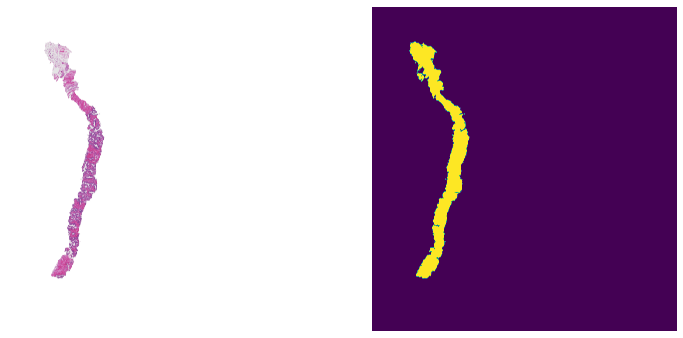

In [3]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 2, figsize=(12, 12))

mask = tile_extraction_v2.mask_tissue(image)

axes[0].imshow(image)
axes[1].imshow(mask)
axes[0].axis('off')
axes[1].axis('off')

In [4]:
coords = tile_extraction_v2.compute_coords(image, precompute=True)
print("    val  y   x\n", coords[:10])

image, coords = tile_extraction_v2.compute_coords(image, precompute=False)
print("    val  y   x\n", coords[:10])

    val  y   x
 [[ 205  808  879]
 [ 200  808 1135]
 [ 203 1064  909]
 [ 203 1064 1165]
 [ 201 1320 1032]
 [ 191 1320 1288]
 [ 175 1576 1308]
 [ 183 1832 1340]
 [ 173 2088 1580]
 [ 157 2344 1784]]
    val  y   x
 [[ 205 1064 1135]
 [ 200 1064 1391]
 [ 203 1320 1165]
 [ 203 1320 1421]
 [ 201 1576 1288]
 [ 191 1576 1544]
 [ 175 1832 1564]
 [ 183 2088 1596]
 [ 173 2344 1836]
 [ 157 2600 2040]]


[<AxesSubplot:> <AxesSubplot:> <AxesSubplot:> <AxesSubplot:>
 <AxesSubplot:>]
3
3
3
3
3


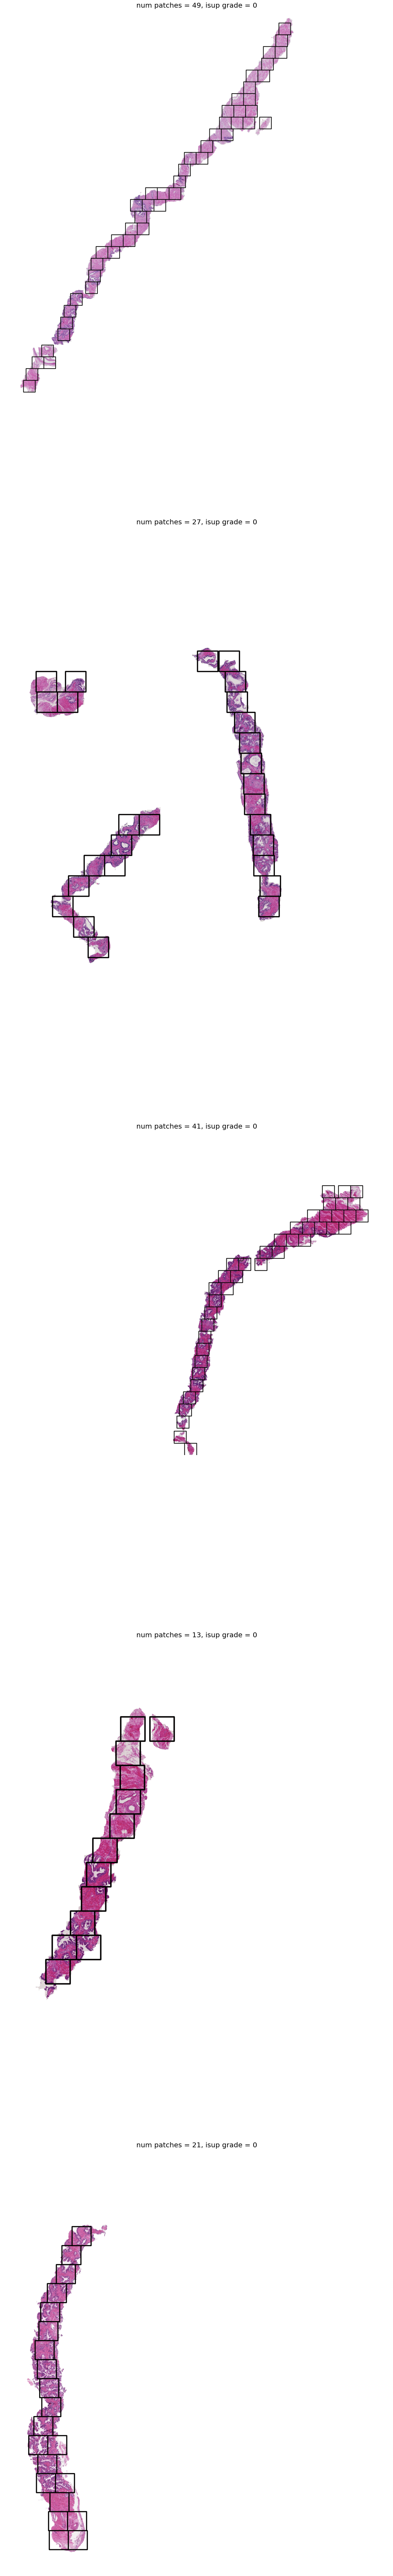

In [5]:
import cv2

fig, axes = plt.subplots(5, 1, figsize=(20, 140))
print(axes)
patch_size = 256

for i, ax in enumerate(axes.reshape(-1)):
    image_path = input_path + data.image_id[i+50] + '.tiff'
    image = tile_extraction_v2.read_image(image_path, 1)
    
    coords = tile_extraction_v2.compute_coords(image,
                            patch_size=patch_size,
                            precompute=True,
                            min_patch_info=0.35,
                            min_axis_info=0.35,
                            min_consec_axis_info=0.35,
                            min_decimal_keep=0.7)
    
    # sort coords (high info -> low info)
    coords = sorted(coords, key= lambda x: x[0], reverse=False)
    for (v, y, x) in coords:
        end_point = (x, y)
        start_point = (x+patch_size, y+patch_size)
        image = cv2.rectangle(image, start_point, end_point, 2, 14)
    
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(
        "num patches = "+str(len(coords))+", isup grade = "+str(data.isup_grade[i+50]),
        fontsize=20)

plt.subplots_adjust(hspace=0.05, wspace=0.05)